2440050874 - Michael Julian - LD01

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/man-juu/MidExam_ML/main/insurance-cost.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


# Check Missing Values

In [ ]:
df.isnull().any()

age         False
sex         False
bmi          True
children    False
smoker       True
region      False
charges     False
dtype: bool

>BMI (continuous variable) and Smoker (categorical variable) have missing values

In [ ]:
males = df[df['sex'] == 'male']
females = df[df['sex'] == 'female']

>>Fill in BMI's missing value with mean (*rata-rata*) based on gender/sex

In [ ]:
continuous_imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
males[['bmi']] = continuous_imputer.fit(males[['bmi']]).transform(males[['bmi']])
females[['bmi']] = continuous_imputer.fit(females[['bmi']]).transform(females[['bmi']])

>>Fill in Smoker's missing value with mode (*modus*) based on gender/sex

In [ ]:
categorical_imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
males[['smoker']] = categorical_imputer.fit(males[['smoker']]).transform(males[['smoker']])
females[['smoker']] = categorical_imputer.fit(females[['smoker']]).transform(females[['smoker']])

In [ ]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
df = males.append(females)
df.isnull().any()

age         False
sex         False
bmi         False
children    False
smoker      False
region      False
charges     False
dtype: bool

>Based on the results above, our data has no missing values.

# Replace Categorical Variable

In [ ]:
oh_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)

In [ ]:
sex = pd.DataFrame(oh_encoder.fit_transform(df[['sex']]))

sex.index = df['sex'].index
sex.columns = ['female', 'male']

dropped_df = df.drop('sex', axis=1)

oh_df1 = pd.concat([dropped_df, sex], axis=1)
oh_df1

,age,bmi,children,smoker,region,charges,female,male
1,18,33.770,1,no,southeast,1725.55230,0.0,1.0
2,28,33.000,3,no,southeast,4449.46200,0.0,1.0
3,33,22.705,0,no,northwest,21984.47061,0.0,1.0
4,32,28.880,0,no,northwest,3866.85520,0.0,1.0
8,37,29.830,2,no,northeast,6406.41070,0.0,1.0
...,...,...,...,...,...,...,...,...
1332,52,44.700,3,no,southwest,11411.68500,1.0,0.0
1334,18,31.920,0,no,northeast,2205.98080,1.0,0.0
1335,18,36.850,0,no,southeast,1629.83350,1.0,0.0
1336,21,25.800,0,no,southwest,2007.94500,1.0,0.0


In [ ]:
smoker = pd.DataFrame(oh_encoder.fit_transform(oh_df1[['smoker']]))

smoker.index = oh_df1['smoker'].index
smoker.columns = ['notSmoker', 'smoker']

dropped_df = oh_df1.drop('smoker', axis=1)

oh_df2 = pd.concat([dropped_df, smoker], axis=1)
oh_df2.drop("notSmoker", axis=1, inplace=True)
oh_df2

,age,bmi,children,region,charges,female,male,smoker
1,18,33.770,1,southeast,1725.55230,0.0,1.0,0.0
2,28,33.000,3,southeast,4449.46200,0.0,1.0,0.0
3,33,22.705,0,northwest,21984.47061,0.0,1.0,0.0
4,32,28.880,0,northwest,3866.85520,0.0,1.0,0.0
8,37,29.830,2,northeast,6406.41070,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
1332,52,44.700,3,southwest,11411.68500,1.0,0.0,0.0
1334,18,31.920,0,northeast,2205.98080,1.0,0.0,0.0
1335,18,36.850,0,southeast,1629.83350,1.0,0.0,0.0
1336,21,25.800,0,southwest,2007.94500,1.0,0.0,0.0


In [ ]:
np.unique(df['region'])

array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)

In [ ]:
region = pd.DataFrame(oh_encoder.fit_transform(oh_df2[['region']]))

region.index = oh_df2['region'].index
region.columns = ['northeast', 'northwest', 'southeast', 'southwest']

dropped_df = oh_df2.drop('region', axis=1)

df = pd.concat([dropped_df, region], axis=1)
df

,age,bmi,children,charges,female,male,smoker,northeast,northwest,southeast,southwest
1,18,33.770,1,1725.55230,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,28,33.000,3,4449.46200,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,33,22.705,0,21984.47061,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,32,28.880,0,3866.85520,0.0,1.0,0.0,0.0,1.0,0.0,0.0
8,37,29.830,2,6406.41070,0.0,1.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1332,52,44.700,3,11411.68500,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1334,18,31.920,0,2205.98080,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1335,18,36.850,0,1629.83350,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1336,21,25.800,0,2007.94500,1.0,0.0,0.0,0.0,0.0,0.0,1.0


>Dummy Variable Trap Prevention

In [ ]:
print('Female:', df[df['female'] == 1]['male'].count())
print('Male:', df[df['male'] == 1]['male'].count())

Female: 662
Male: 676


>>Male has more data than female

In [ ]:
print('Northeast:', df[df['northeast'] == 1]['northeast'].count())
print('Northwest:', df[df['northwest'] == 1]['northwest'].count())
print('Southeast:', df[df['southeast'] == 1]['southeast'].count())
print('Southwest:', df[df['southwest'] == 1]['southwest'].count())

Northeast: 324
Northwest: 325
Southeast: 364
Southwest: 325


>>Southeast has the most data on region category

In [ ]:
df.drop(['male', 'southeast'], axis=1, inplace=True)
df.head()

,age,bmi,children,charges,female,smoker,northeast,northwest,southwest
1,18,33.770,1,1725.55230,0.0,0.0,0.0,0.0,0.0
2,28,33.000,3,4449.46200,0.0,0.0,0.0,0.0,0.0
3,33,22.705,0,21984.47061,0.0,0.0,0.0,1.0,0.0
4,32,28.880,0,3866.85520,0.0,0.0,0.0,1.0,0.0
8,37,29.830,2,6406.41070,0.0,0.0,1.0,0.0,0.0


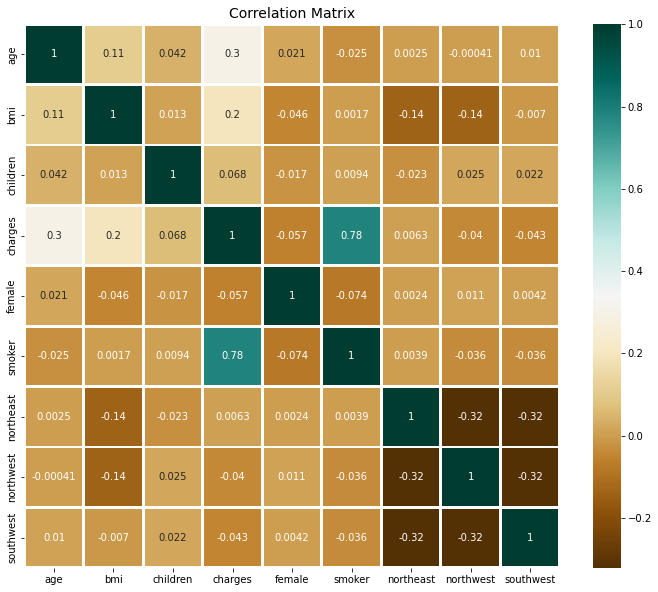

In [ ]:
plt.figure(figsize=(12, 10))
plt.title("Correlation Matrix", fontsize=14)
plt.subplots_adjust(hspace=2, wspace=2)
sns.heatmap(data=df.corr(), cmap='BrBG',annot=True, linewidths = 2)
plt.show()

One of the assumptions of linear reggression is that independent variables should have low correlation or uncorrelated to each other. As we can see, all of the independent variables have correlation value below 0.5 to each other which fulfills the assumption mentioned before

Based on the correlation matrix above, features ***smoker*** (0.78), ***age*** (0.3), and ***bmi*** (0.2) have higher correlation (>0.1) with the output variable charges.

I'll drop all features except the three mentioned above.


In [ ]:
df = df.drop(['children', 'female', 'northeast', 'northwest', 'southwest'], axis=1)
df.head()

,age,bmi,charges,smoker
1,18,33.770,1725.55230,0.0
2,28,33.000,4449.46200,0.0
3,33,22.705,21984.47061,0.0
4,32,28.880,3866.85520,0.0
8,37,29.830,6406.41070,0.0


Smoker alone is insufficient to predict the model because smoker is a categorical variable. So, I'll use features smoker, age, and bmi to make the Linear Regression Model. 

# Data Splitting

In [ ]:
sc = StandardScaler()
X = df.drop('charges',axis=1)
X_new = sc.fit_transform(X)
y = df['charges']

In [ ]:
#Training : Test = 4 : 1
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

In [ ]:
print(f'X Train data shape: {X_train.shape}')
print(f'Y Train data shape: {y_train.shape}')

X Train data shape: (1070, 3)
Y Train data shape: (1070,)


# Building Linear Regression Model

In [ ]:
class LinearRegression:
    def init(self):
        self.weights = None
        self.bias = None

    def fit(self, X, y, n_iters, learn_rate):
        n_samples, n_features = X.shape
        loss = []
        self.weights = np.zeros(n_features)
        self.intercept = 0
        self.n_iters = n_iters
        self.learn_rate = learn_rate

        for i in range(self.n_iters):
            y_pred = np.dot(X, self.weights) + self.intercept
            db = ( 2 * np.sum(y_pred - y)) / n_samples
            dw =  ( 2 * np.dot(X.T, (y_pred - y))) / n_samples
            loss.append(mean_squared_error(y, y_pred))
            self.intercept -= self.learn_rate * db
            self.weights -= self.learn_rate * dw        
        
        return loss
    
    def predict(self, X):
        y_pred = np.dot(X, self.weights) + self.intercept
        return y_pred

In [ ]:
all_loss = []

for learning_rate in [0.001, 0.005, 0.01]:
  model = LinearRegression()
  n_iters = 1070*3
  loss = model.fit(X_train, y_train, n_iters, learning_rate)
  print(f'Learning Rate: {learning_rate}')
  print(f'Intercept/Bias: {model.intercept}')
  print(f'Weight/Theta: {model.weights}')
  print(f'')

  all_loss.append([learning_rate, loss])

Learning Rate: 0.001
Intercept/Bias: 13394.292878810851
Weight/Theta: [3729.73261308 2102.6316948  9650.63646337]

Learning Rate: 0.005
Intercept/Bias: 13415.14696763576
Weight/Theta: [3736.38612435 2099.64839233 9665.13134874]

Learning Rate: 0.01
Intercept/Bias: 13415.146967635887
Weight/Theta: [3736.38612435 2099.64839233 9665.13134874]



There's not much change from learning rate 0.005 to learning rate 0.01, so I'll use learning rate 0.005

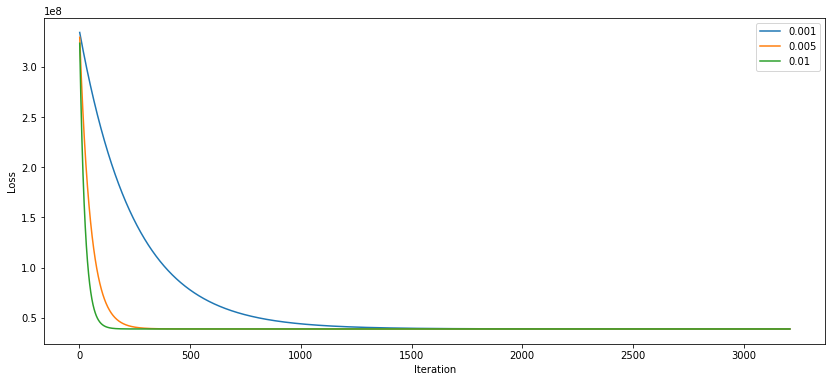

In [ ]:
plt.figure(figsize=(14,6))
for i in range(len(all_loss)):
  plt.plot(np.arange(1, n_iters), all_loss[i][1][1:], label=all_loss[i][0])
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [ ]:
model = LinearRegression()
n_iters = 1070*3
loss = model.fit(X_train, y_train, n_iters, 0.005)

In [ ]:
bias = model.intercept
print('Bias (Intercept) = ', bias)

Bias (Intercept) =  13415.14696763576


In [ ]:
weight = model.weights
weights = {'Weights':weight}
weight_list = pd.DataFrame(weights)
weight_list

,Weights
0,3736.386124
1,2099.648392
2,9665.131349


In [ ]:
print('Model Equation (y) = ', weight[0], 'x1 + ', weight[1], 'x2 + ', weight[2], 'x3 + ', bias)
print('x1 -> age')
print('x2 -> bmi')
print('x2 -> smoker')

Model Equation (y) =  3736.38612434747 x1 +  2099.648392326853 x2 +  9665.13134873846 x3 +  13415.14696763576
x1 -> age
x2 -> bmi
x2 -> smoker


# Implementing model on train set

In [ ]:
Y_pred = model.predict(X_train)
y_train_compare = {'y_original': y_train, 'y_pred':model.predict(X_train)}
train_compare = pd.DataFrame(y_train_compare)
train_compare

,y_original,y_pred
1090,41676.08110,36484.378465
1232,12479.70895,10371.775200
935,12233.82800,12699.423995
593,15359.10450,24626.613640
958,41034.22140,34996.441047
...,...,...
842,36021.01120,28924.618624
913,7626.99300,8708.896907
1253,15828.82173,8264.946878
370,13415.03810,11022.926893


# Implementing model on test set

In [ ]:
y_pred_test = model.predict(X_test)
y_test_compare = {'y_true': y_test, 'y_pred':model.predict(X_test)}
test_compare = pd.DataFrame(y_test_compare)
test_compare

,y_true,y_pred
174,2855.437550,5402.090586
427,7323.734819,2365.659525
431,4906.409650,2215.211938
1248,1633.961800,6036.842900
507,3077.095500,1298.025105
...,...,...
229,9225.256400,8804.119726
1121,8347.164300,12917.318814
1052,9288.026700,10841.874786
1066,8978.185100,13146.184834


In [ ]:
print('MAE: ',mean_absolute_error(y_test, y_pred_test))
print('MSE: ',mean_squared_error(y_test, y_pred_test))
print('RMSE: ',np.sqrt(mean_squared_error(y_test, y_pred_test)))
print('R^2 Score: ',r2_score(y_test, y_pred_test))

MAE:  4059.118026507439
MSE:  32416188.310281448
RMSE:  5693.52160883591
R^2 Score:  0.7364006244495009


>Based on the above evaluation, the resulting model is not perfect yet.

# Comparison Plot

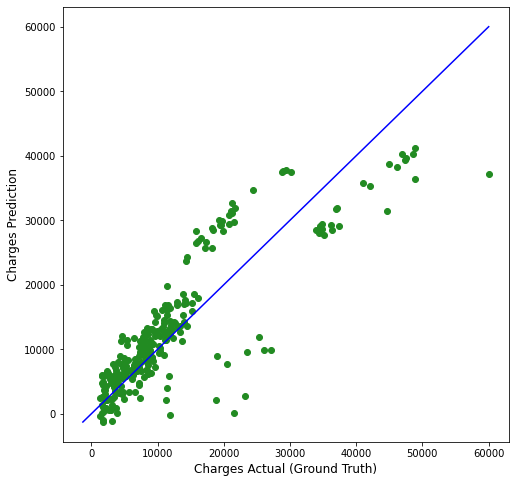

In [ ]:
plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred_test, c='forestgreen')

p1 = max(max(y_test), max(y_pred_test))
p2 = min(min(y_test), min(y_pred_test))

plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Charges Actual (Ground Truth)', fontsize=12)
plt.ylabel('Charges Prediction', fontsize=12)
plt.show()